**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля
-4 балла после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.data import loadlocal_mnist
from sklearn.neighbors import KDTree
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.k = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        if self.algorithm is 'kd_tree':
            self.tree = KDTree(X.astype('float32'))
        if self.algorithm is 'brute':
            self.train = np.float32(X)
        self.train_index = np.int16(y)
        self.classes_number = self.train_index.max() + 1
        return self

    def predict(self, X):
        return self.predict_proba(X).argmax(axis=1)

    def predict_proba(self, X):
        if self.algorithm is 'kd_tree':
            distances, neighbors = self.tree.query(X.astype('float32'),
                                                   k=self.k)
        if self.algorithm is 'brute':
            distances = self.custom_l2_norm(X.astype('float32'))
            neighbors = np.argpartition(distances, self.k, axis=1)[:, :self.k]
        predicts = self.train_index[neighbors]
        result = np.apply_along_axis(
            lambda x: np.bincount(x,
                                  minlength=self.classes_number),
            axis=1,
            arr=predicts)
        return result / self.k

    def custom_l2_norm(self, X):
        train_squared_sum = np.ones([2, self.train.shape[0]], dtype='float32')
        test_squared_sum = np.ones([2, X.shape[0]], dtype='float32')
        train_squared_sum[0] = np.flip((self.train ** 2).sum(axis=1))
        test_squared_sum[1] = (X.astype('float32') ** 2).sum(axis=1)
        return np.sqrt(
            np.matmul(np.rot90(train_squared_sum), test_squared_sum) - 2 *
            np.matmul(self.train.astype('float32'), X.astype('float32').T)).T

    def score(self, X, y):
        predict = self.predict(X)
        return np.average(y == predict)


**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 1.45 ms, sys: 0 ns, total: 1.45 ms
Wall time: 1.13 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 205 µs, sys: 19 µs, total: 224 µs
Wall time: 170 µs


MyKNeighborsClassifier(algorithm='brute', n_neighbors=None)

In [8]:
%time clf.predict(X_test)

CPU times: user 3.8 ms, sys: 351 µs, total: 4.15 ms
Wall time: 23.3 ms


array([1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 1.58 ms, sys: 151 µs, total: 1.74 ms
Wall time: 1.1 ms


array([1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.92 ms, sys: 22 µs, total: 1.94 ms
Wall time: 1.2 ms


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.87 ms, sys: 24 µs, total: 1.9 ms
Wall time: 1.03 ms


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [12]:
clf.score(X_test, y_test)

0.8666666666666667

In [13]:
my_clf.score(X_test, y_test)

0.8666666666666667

Задание 3

In [14]:
k_max = 50
tests = 1000

scores_on_test = np.zeros([tests, k_max])
mean_scores_on_train = np.zeros([tests, k_max])

for test in range(tests):
    X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                        iris.target,
                                                        test_size=0.1,
                                                        stratify=iris.target)
    for k in range(2, k_max):
        global_permutation = np.random.permutation(X_train.shape[0])
        global_permutation = global_permutation.reshape(5, 27)
        sum_scores_on_test = 0
        for i in range(global_permutation.shape[0]):
            local_permutatin = global_permutation[i]
            val_test = X_train[local_permutatin]
            val_y_test = y_train[local_permutatin]
            val_train = X_train[np.delete(global_permutation,
                                          i,
                                          axis=0).flatten()]
            val_y_train = y_train[np.delete(global_permutation,
                                            i,
                                            axis=0).flatten()]
            my_clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute')
            my_clf.fit(val_train, val_y_train)
            sum_scores_on_test += my_clf.score(val_test, val_y_test)
        mean_scores_on_train[test, k] = sum_scores_on_test / 5
        scores_on_test[test, k] = my_clf.score(X_test, y_test)
mean_scores_on_train = mean_scores_on_train[:, 2:]
scores_on_test = scores_on_test[:, 2:]

best on train:  11
best on test:  11


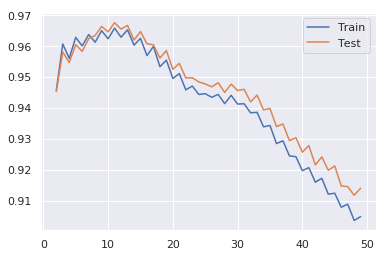

In [15]:
x = np.arange(2, k_max, dtype='int16')
sns.set()
sns.lineplot(y=np.mean(mean_scores_on_train, axis=0), x=x)
sns.lineplot(y=np.mean(scores_on_test, axis=0), x=x)
plt.legend(['Train', 'Test'])
print("best on train: ", x[np.mean(mean_scores_on_train,
                                   axis=0).argsort()[-1]])
print("best on test: ", x[np.mean(scores_on_test,
                                  axis=0).argsort()[-1]])

**MNIST**

In [ ]:
#mnist = fetch_mldata('MNIST original')


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [16]:
X_train, y_train = loadlocal_mnist('data_sets/train-images-idx3-ubyte',
                                   'data_sets/train-labels-idx1-ubyte')
X_test, y_test = loadlocal_mnist('data_sets/t10k-images-idx3-ubyte',
                                 'data_sets/t10k-labels-idx1-ubyte')

In [17]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 4.61 ms, sys: 0 ns, total: 4.61 ms
Wall time: 4.36 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 25 ms, sys: 32 ms, total: 57 ms
Wall time: 56.8 ms


MyKNeighborsClassifier(algorithm='brute', n_neighbors=None)

In [20]:
%time clf.predict(X_test)

CPU times: user 40 s, sys: 3.26 s, total: 43.3 s
Wall time: 16.3 s


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [21]:
%time my_clf.predict(X_test)

CPU times: user 37.4 s, sys: 3.8 s, total: 41.2 s
Wall time: 24 s


array([7, 2, 1, ..., 4, 5, 6])

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 39.1 s, sys: 3.18 s, total: 42.3 s
Wall time: 15.8 s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 35.9 s, sys: 3.34 s, total: 39.2 s
Wall time: 22.7 s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
clf.score(X_test, y_test)

0.9627

In [25]:
my_clf.score(X_test, y_test)

0.9627

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [27]:
X_train, y_train = loadlocal_mnist('data_sets/train-images-idx3-ubyte',
                                   'data_sets/train-labels-idx1-ubyte')
X_test, y_test = loadlocal_mnist('data_sets/t10k-images-idx3-ubyte',
                                 'data_sets/t10k-labels-idx1-ubyte')

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 30.9 s, sys: 214 ms, total: 31.1 s
Wall time: 31 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 31.2 s, sys: 173 ms, total: 31.4 s
Wall time: 31.3 s


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=None)

In [30]:
%time clf.predict(X_test)

CPU times: user 11min 8s, sys: 48.2 ms, total: 11min 8s
Wall time: 11min 8s


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [31]:
%time my_clf.predict(X_test)

CPU times: user 12min 5s, sys: 160 ms, total: 12min 5s
Wall time: 12min 5s


array([7, 2, 1, ..., 4, 5, 6])

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 13min 5s, sys: 136 ms, total: 13min 5s
Wall time: 13min 5s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 10min 59s, sys: 72.2 ms, total: 10min 59s
Wall time: 10min 59s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
clf.score(X_test, y_test)

0.9627

In [35]:
my_clf.score(X_test, y_test)

0.9627

Задание 5

In [ ]:
# seaborn - используется для построения графиков и визуализации данных максимально просто, быстро и комфортно 

# matplotlib - используется для построения графиков почти "с нуля", в отличии от библиотек, которые на ней построены и предлагают большое число готовых решений

# train_test_split - функция, служащая для разделения данных на наборы для тренировки и тестирования, имеет параметр stratify, который отвечает за равномерное 
# (пропорциональное) разделение классов

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) загружается список преобразований и они последовательно выполняются, каждое последующее преобразование
# берет данные, полученные с предыдущего 

# StandardScaler (from sklearn.preprocessing import StandardScaler) - подготовка данных для повышения стабильности тренировок. Вычитая среднее центрирует данные,
# деля на std - нормализует (если по разным осям непропорциональные отклонения)

# ClassifierMixin класс, от которого наследуются модели для задач классификации, реализован score

# NeighborsBase класс, от которого наследуются knn модели 

# KNeighborsMixin - поиск k ближайших соседей

# SupervisedIntegerMixin - тут реализован метод для тренировки модели с известными лейблами (обучение с учителем)